# Boston Crimes Analysis Report

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [3]:
offense_file = pd.read_excel('offense_codes.xlsx')
crime_file = pd.read_excel('crime.xlsx')

In [4]:
crime = pd.DataFrame(data=crime_file)
offense = pd.DataFrame(data=offense_file)
boston_crime = crime.merge(offense, how = 'inner', left_on = 'OFFENSE_CODE', right_on = 'CODE')
boston_crime['SHOOTING'].fillna('N', inplace = True)
boston_crime['STREET'] = boston_crime['STREET'].astype(str)
boston_crime['STREET'] = boston_crime['STREET'].apply(lambda i: i.title())
boston_crime['OFFENSE_DESCRIPTION'] = boston_crime['OFFENSE_DESCRIPTION'].apply(lambda i: i.title())
boston_crime['NAME'] = boston_crime['NAME'].apply(lambda i: i.title())

In [5]:
crime_count = pd.pivot_table(boston_crime, values = 'INCIDENT_NUMBER', index = 'NAME', aggfunc = 'count')
crime_count = crime_count.reset_index().sort_values(by = 'INCIDENT_NUMBER', ascending = False)

In [6]:
gun_crime = pd.pivot_table(data = boston_crime, values = 'INCIDENT_NUMBER', index = ['NAME', 'SHOOTING'], aggfunc = 'count').reset_index()
gun_crime = gun_crime.where(gun_crime['SHOOTING'] == 'Y').dropna().sort_values(by = 'INCIDENT_NUMBER', ascending = False)

In [7]:
dates = boston_crime[['INCIDENT_NUMBER', 'OCCURRED_ON_DATE', 'DISTRICT']].groupby('OCCURRED_ON_DATE').count().reset_index()
dates['DATE'] = dates['OCCURRED_ON_DATE'].dt.strftime("%Y-%m")
dates = dates[['INCIDENT_NUMBER', 'DATE']].groupby('DATE').count().reset_index()
dates = dates.where(dates['DATE'] > '2015-06')
dates = dates.where(dates['DATE'] < '2018-09').dropna()

In [8]:
gun_crime_dates = boston_crime.where(boston_crime['SHOOTING'] == 'Y').dropna()
gun_crime_dates = gun_crime_dates[['INCIDENT_NUMBER', 'OCCURRED_ON_DATE', 'DISTRICT']].groupby('OCCURRED_ON_DATE').count().reset_index()
gun_crime_dates['DATE'] = gun_crime_dates['OCCURRED_ON_DATE'].dt.strftime("%Y-%m")
gun_crime_dates = gun_crime_dates[['INCIDENT_NUMBER', 'DATE']].groupby('DATE').count().reset_index()
gun_crime_dates = gun_crime_dates.where(gun_crime_dates['DATE'] > '2015-06')
gun_crime_dates = gun_crime_dates.where(gun_crime_dates['DATE'] < '2018-09').dropna()

In [9]:
weekday_crime = pd.pivot_table(data = boston_crime[['INCIDENT_NUMBER', 'DAY_OF_WEEK', 'YEAR']], values = 'INCIDENT_NUMBER', index = ['DAY_OF_WEEK', 'YEAR'], aggfunc = 'count').reset_index()

In [10]:
weekday_number = []

for i in weekday_crime['DAY_OF_WEEK']:
    if i == 'Sunday':
        weekday_number.append(1)
    elif i == 'Monday':
        weekday_number.append(2)
    elif i == 'Tuesday':
        weekday_number.append(3)
    elif i == 'Wednesday':
        weekday_number.append(4)
    elif i == 'Thursday':
        weekday_number.append(4)
    elif i == 'Friday':
        weekday_number.append(6)
    else:
        weekday_number.append(7)

In [11]:
df = pd.DataFrame(data = weekday_number)
weekday_crime['WEEKDAY_NUMBER'] = df
weekday_crime = weekday_crime.sort_values(by = 'WEEKDAY_NUMBER')

In [12]:
years = [2015, 2016, 2017, 2018]

In [13]:
district_count = boston_crime[['INCIDENT_NUMBER', 'DISTRICT']].groupby('DISTRICT').count().reset_index()

In [14]:
incidents_per_hour = boston_crime[['HOUR', 'INCIDENT_NUMBER', 'DISTRICT']]

In [15]:
incidents_per_hour = pd.pivot_table(data = incidents_per_hour, values = 'INCIDENT_NUMBER', index = 'HOUR', columns = 'DISTRICT', aggfunc = 'count').reset_index().fillna(0)

In [16]:
mean_per_hour = boston_crime[['HOUR', 'MONTH', 'INCIDENT_NUMBER']]
mean_per_hour['INCIDENT_NUMBER'] = 1
mean_per_hour = mean_per_hour.groupby(['HOUR', 'MONTH']).sum().reset_index()
mean_per_hour = mean_per_hour.groupby('HOUR').mean().reset_index()
mean_per_hour = mean_per_hour[['HOUR', 'INCIDENT_NUMBER']]

C:\Users\dmate\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
monthly_crime = boston_crime[['INCIDENT_NUMBER', 'MONTH', 'YEAR', 'SHOOTING']].pivot_table(values = 'INCIDENT_NUMBER', columns = 'SHOOTING', index = ['MONTH', 'YEAR'], aggfunc = 'count').reset_index()
monthly_crime = monthly_crime.groupby('MONTH').mean().reset_index()
monthly_crime = monthly_crime[['MONTH', 'N', 'Y']]

In [18]:
MONTH_NAME = []

for i in monthly_crime['MONTH']:
    if i == 1:
        MONTH_NAME.append('January')
    elif i == 2:
        MONTH_NAME.append('February')
    elif i == 3:
        MONTH_NAME.append('March')
    elif i == 4:
        MONTH_NAME.append('April')
    elif i == 5:
        MONTH_NAME.append('May')
    elif i == 6:
        MONTH_NAME.append('June')
    elif i == 7:
        MONTH_NAME.append('July')
    elif i == 8:
        MONTH_NAME.append('August')
    elif i == 9:
        MONTH_NAME.append('September')
    elif i == 10:
        MONTH_NAME.append('October')
    elif i == 11:
        MONTH_NAME.append('November')
    else:
        MONTH_NAME.append('December')


In [19]:
monthly_crime['MONTH_NAME'] = MONTH_NAME

In [20]:
monthly_crime = monthly_crime.sort_values(by = 'MONTH', ascending = False)

In [73]:
colors = ['green', 'orange', 'grey', 'blue', 'magenta', 'purple', 'red', 'yellow', 'pink', 'brown', 'black', 'teal']

__The following horizontal bar graph, displays the most common crimes. Ordered from top to bottom, with the most common to the least common crime.__

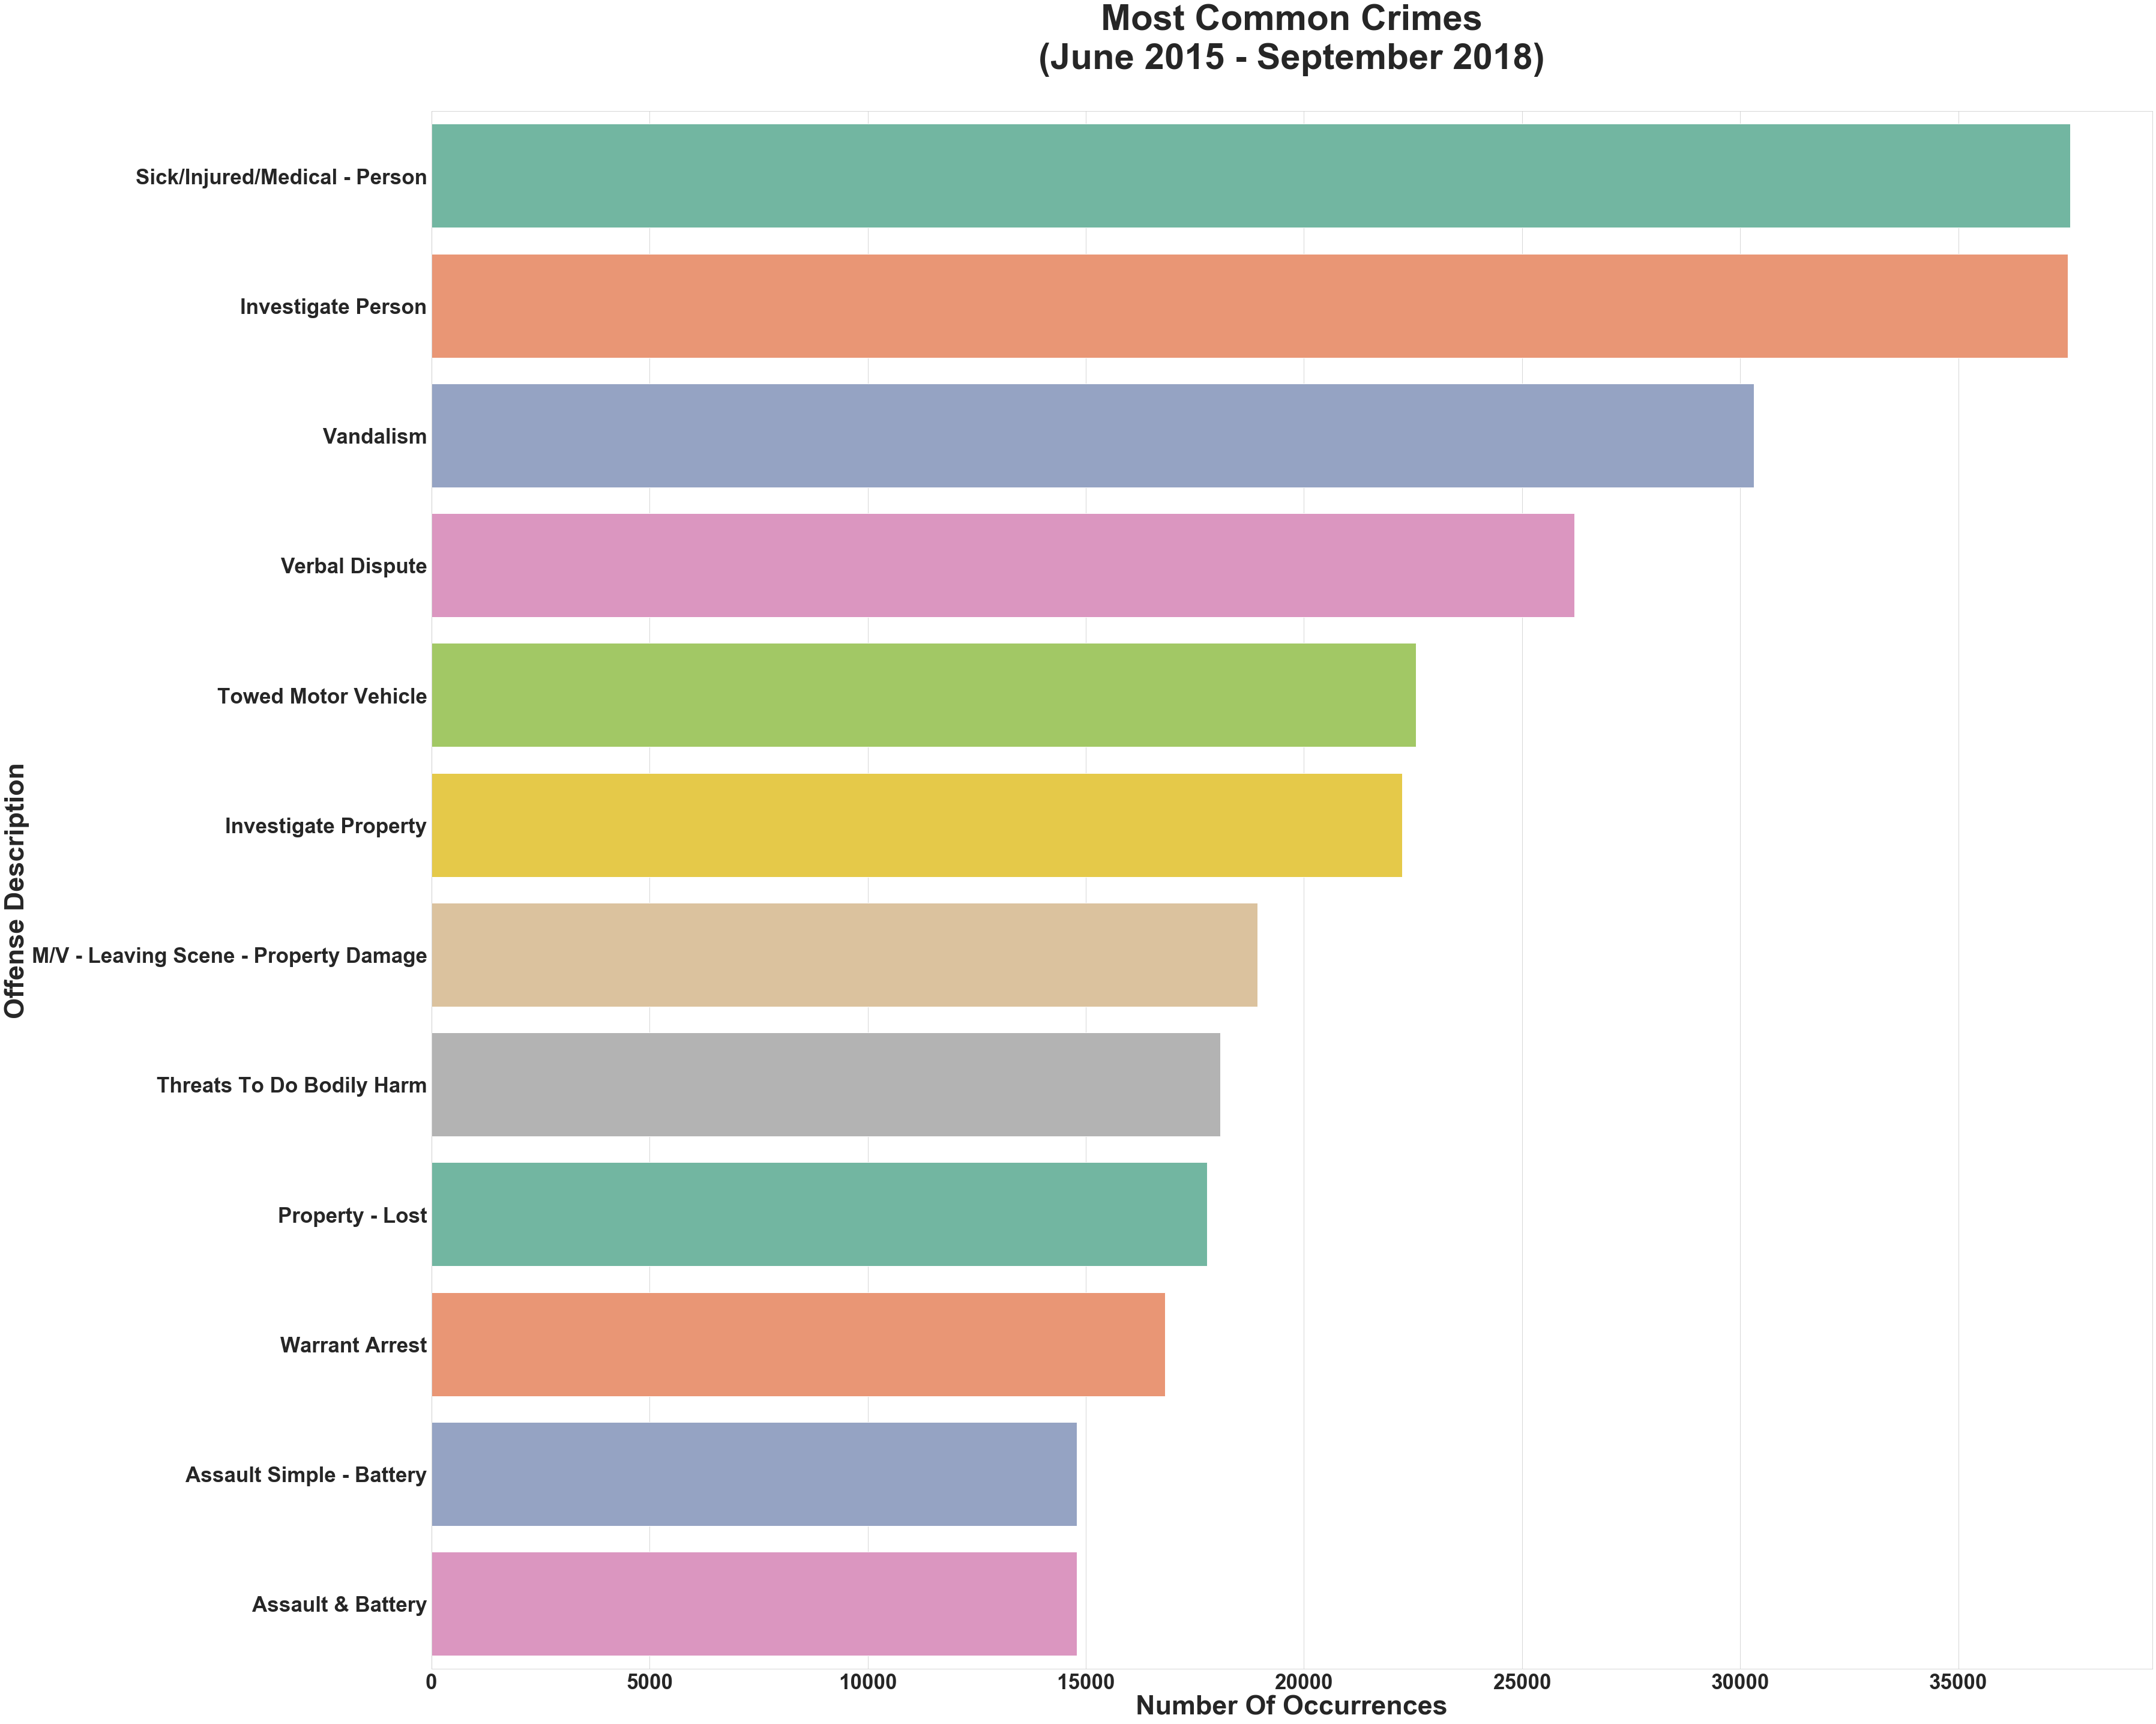

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize = (50,40))
x = sns.barplot(data = crime_count.where(crime_count['INCIDENT_NUMBER'] > 10000).dropna(), y = 'NAME', x = 'INCIDENT_NUMBER', palette = 'Set2')
x.set_ylabel('Offense Description', size = 45, weight = 'bold')
plt.title('Most Common Crimes\n(June 2015 - September 2018)\n', size = 60, weight = 'bold')
plt.yticks(size = 35, weight = 'bold')
plt.xticks(size = 35, weight = 'bold')
x.set_xlabel('Number of Occurrences'.title(), size = 45, weight = 'bold')
plt.tight_layout()
plt.show()

__The following horizontal bar graph, displays the most gun common crimes. Ordered from top to bottom, with the most common to the least common crime.__

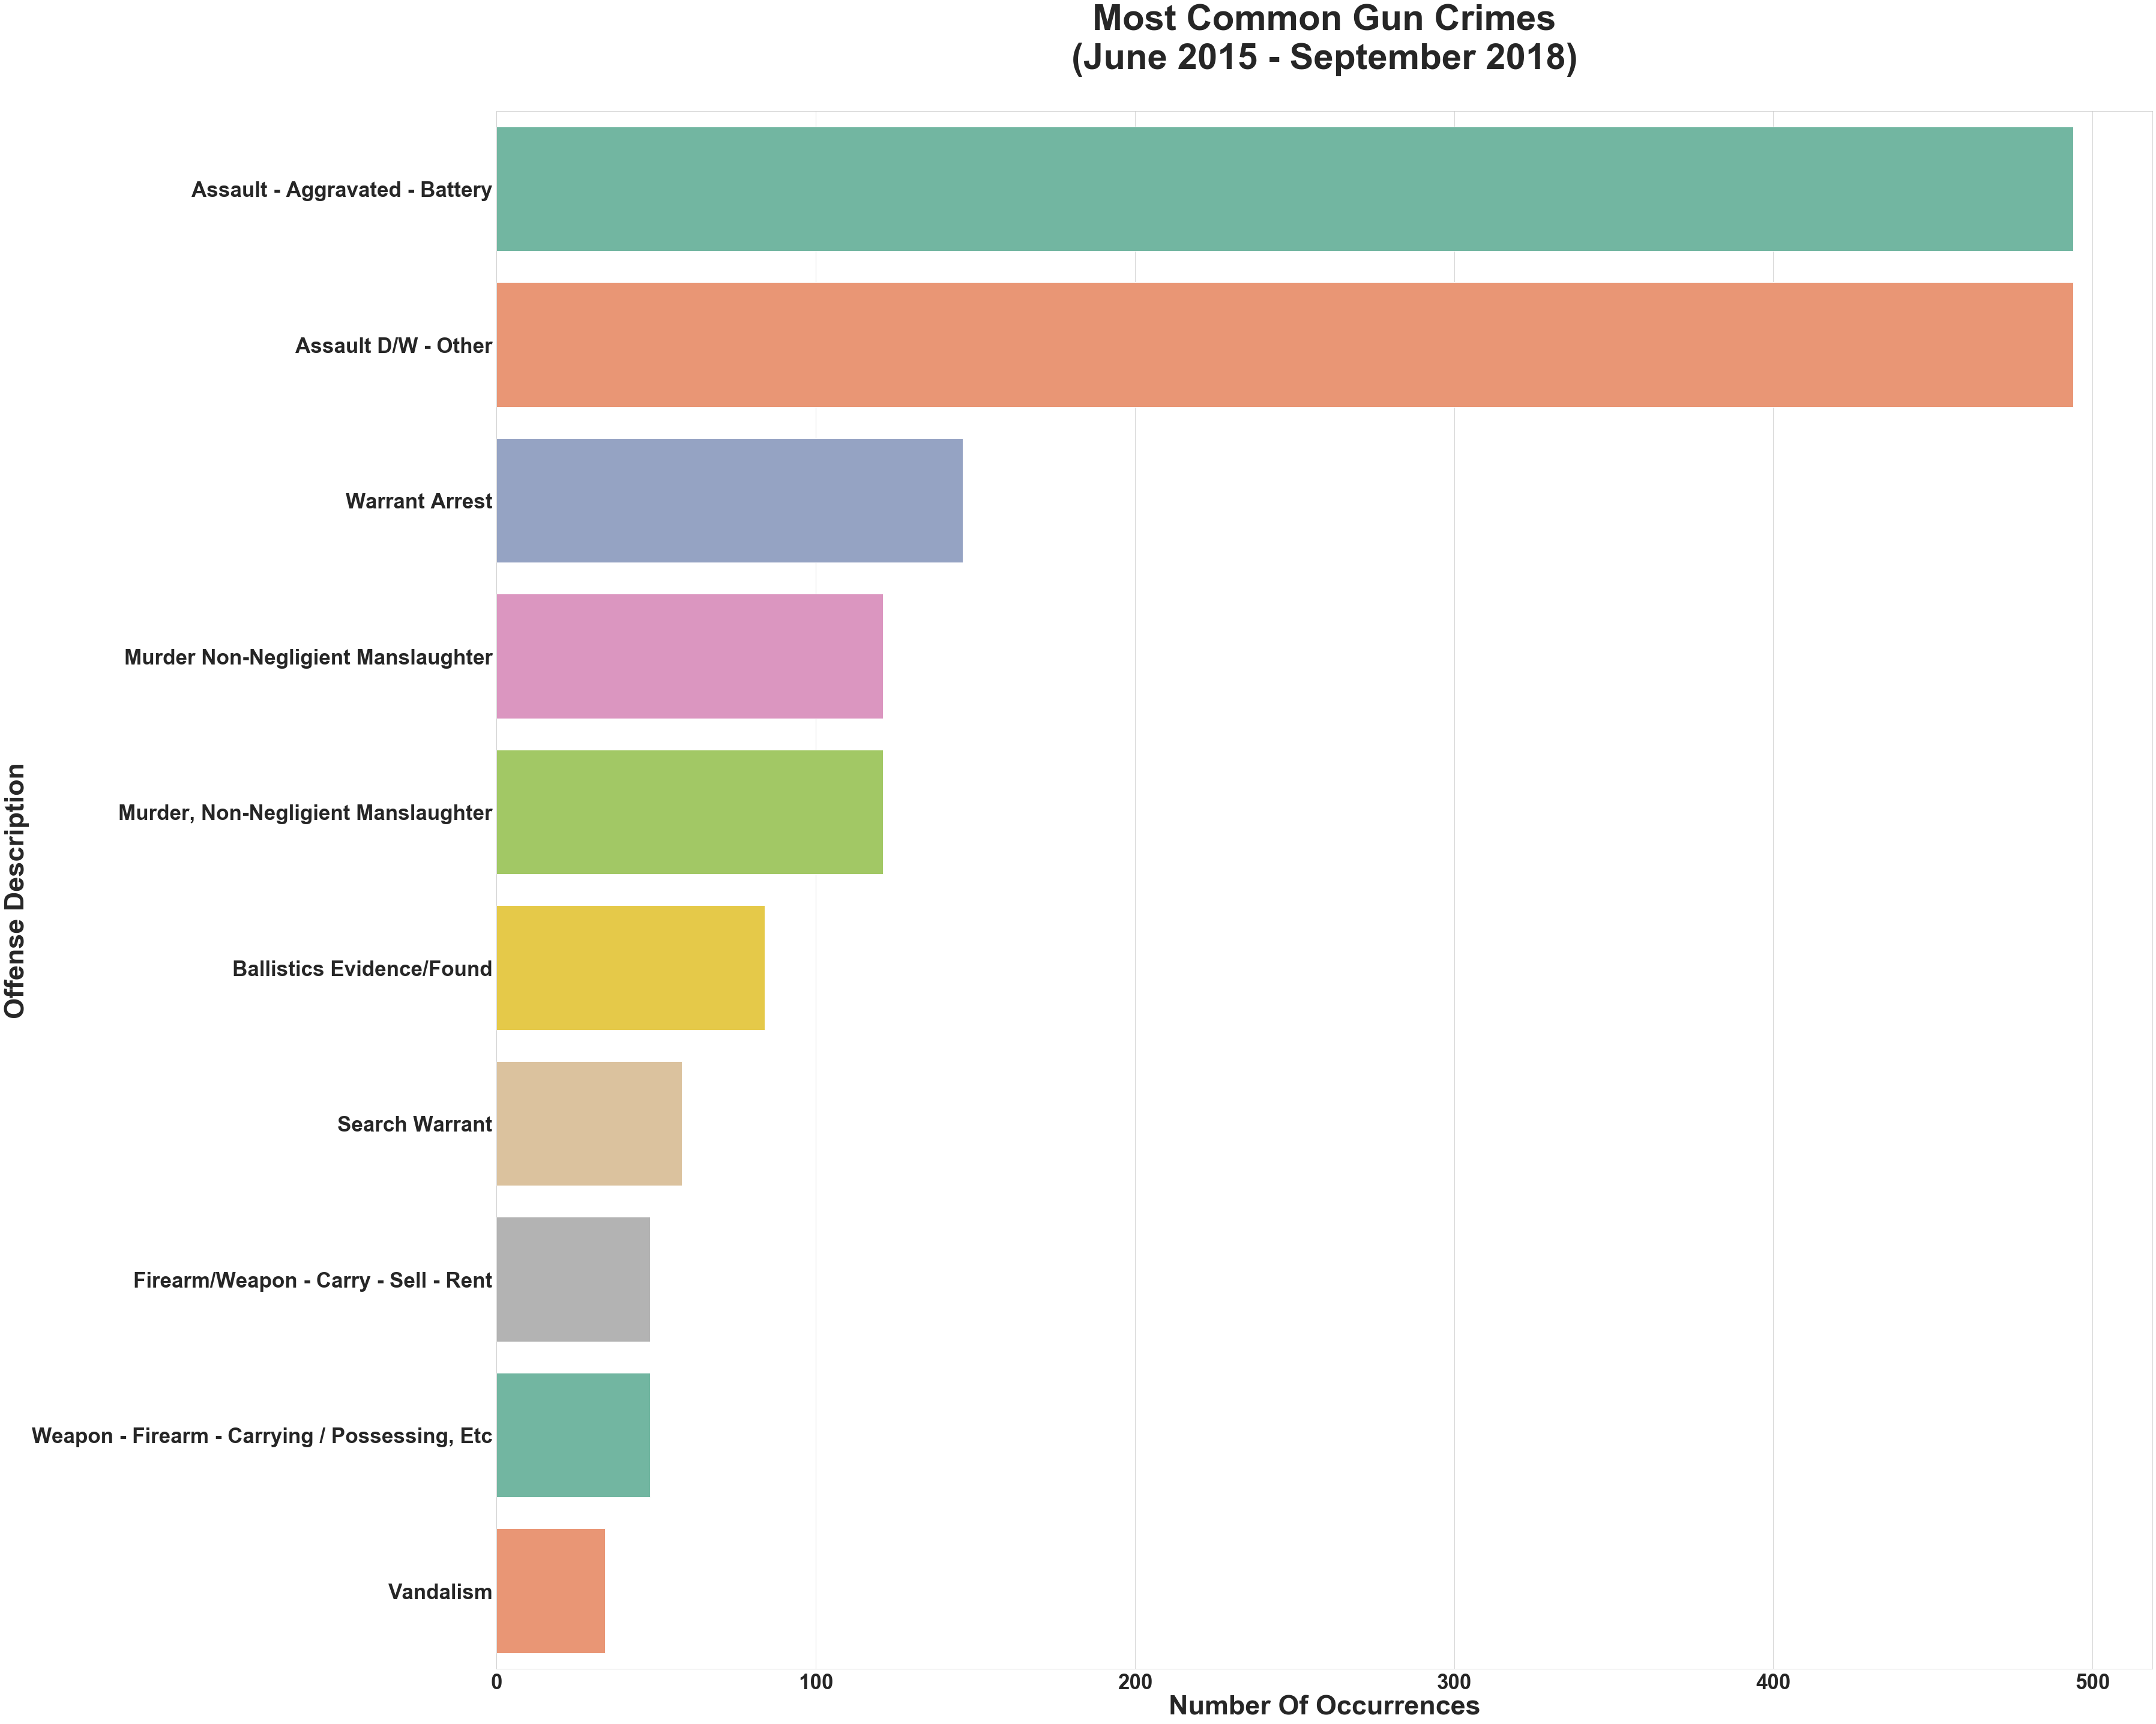

In [22]:
plt.figure(figsize = (50,40))
x = sns.barplot(data = gun_crime.where(gun_crime['INCIDENT_NUMBER'] > 30).dropna(), y = 'NAME', x = 'INCIDENT_NUMBER', palette = 'Set2')
x.set_ylabel('Offense Description', size = 45, weight = 'bold')
plt.title('Most Common Gun Crimes\n(June 2015 - September 2018)\n', size = 60, weight = 'bold')
plt.yticks(size = 35, weight = 'bold')
plt.xticks(size = 35, weight = 'bold')
x.set_xlabel('Number of Occurrences'.title(), size = 45, weight = 'bold')
plt.tight_layout()
plt.show()

__The following line graph displays the quantity of crimes committed, relative to time.__

__The following charts displays that generally the quantity of crimes committed dip during February, and peak during the August.__

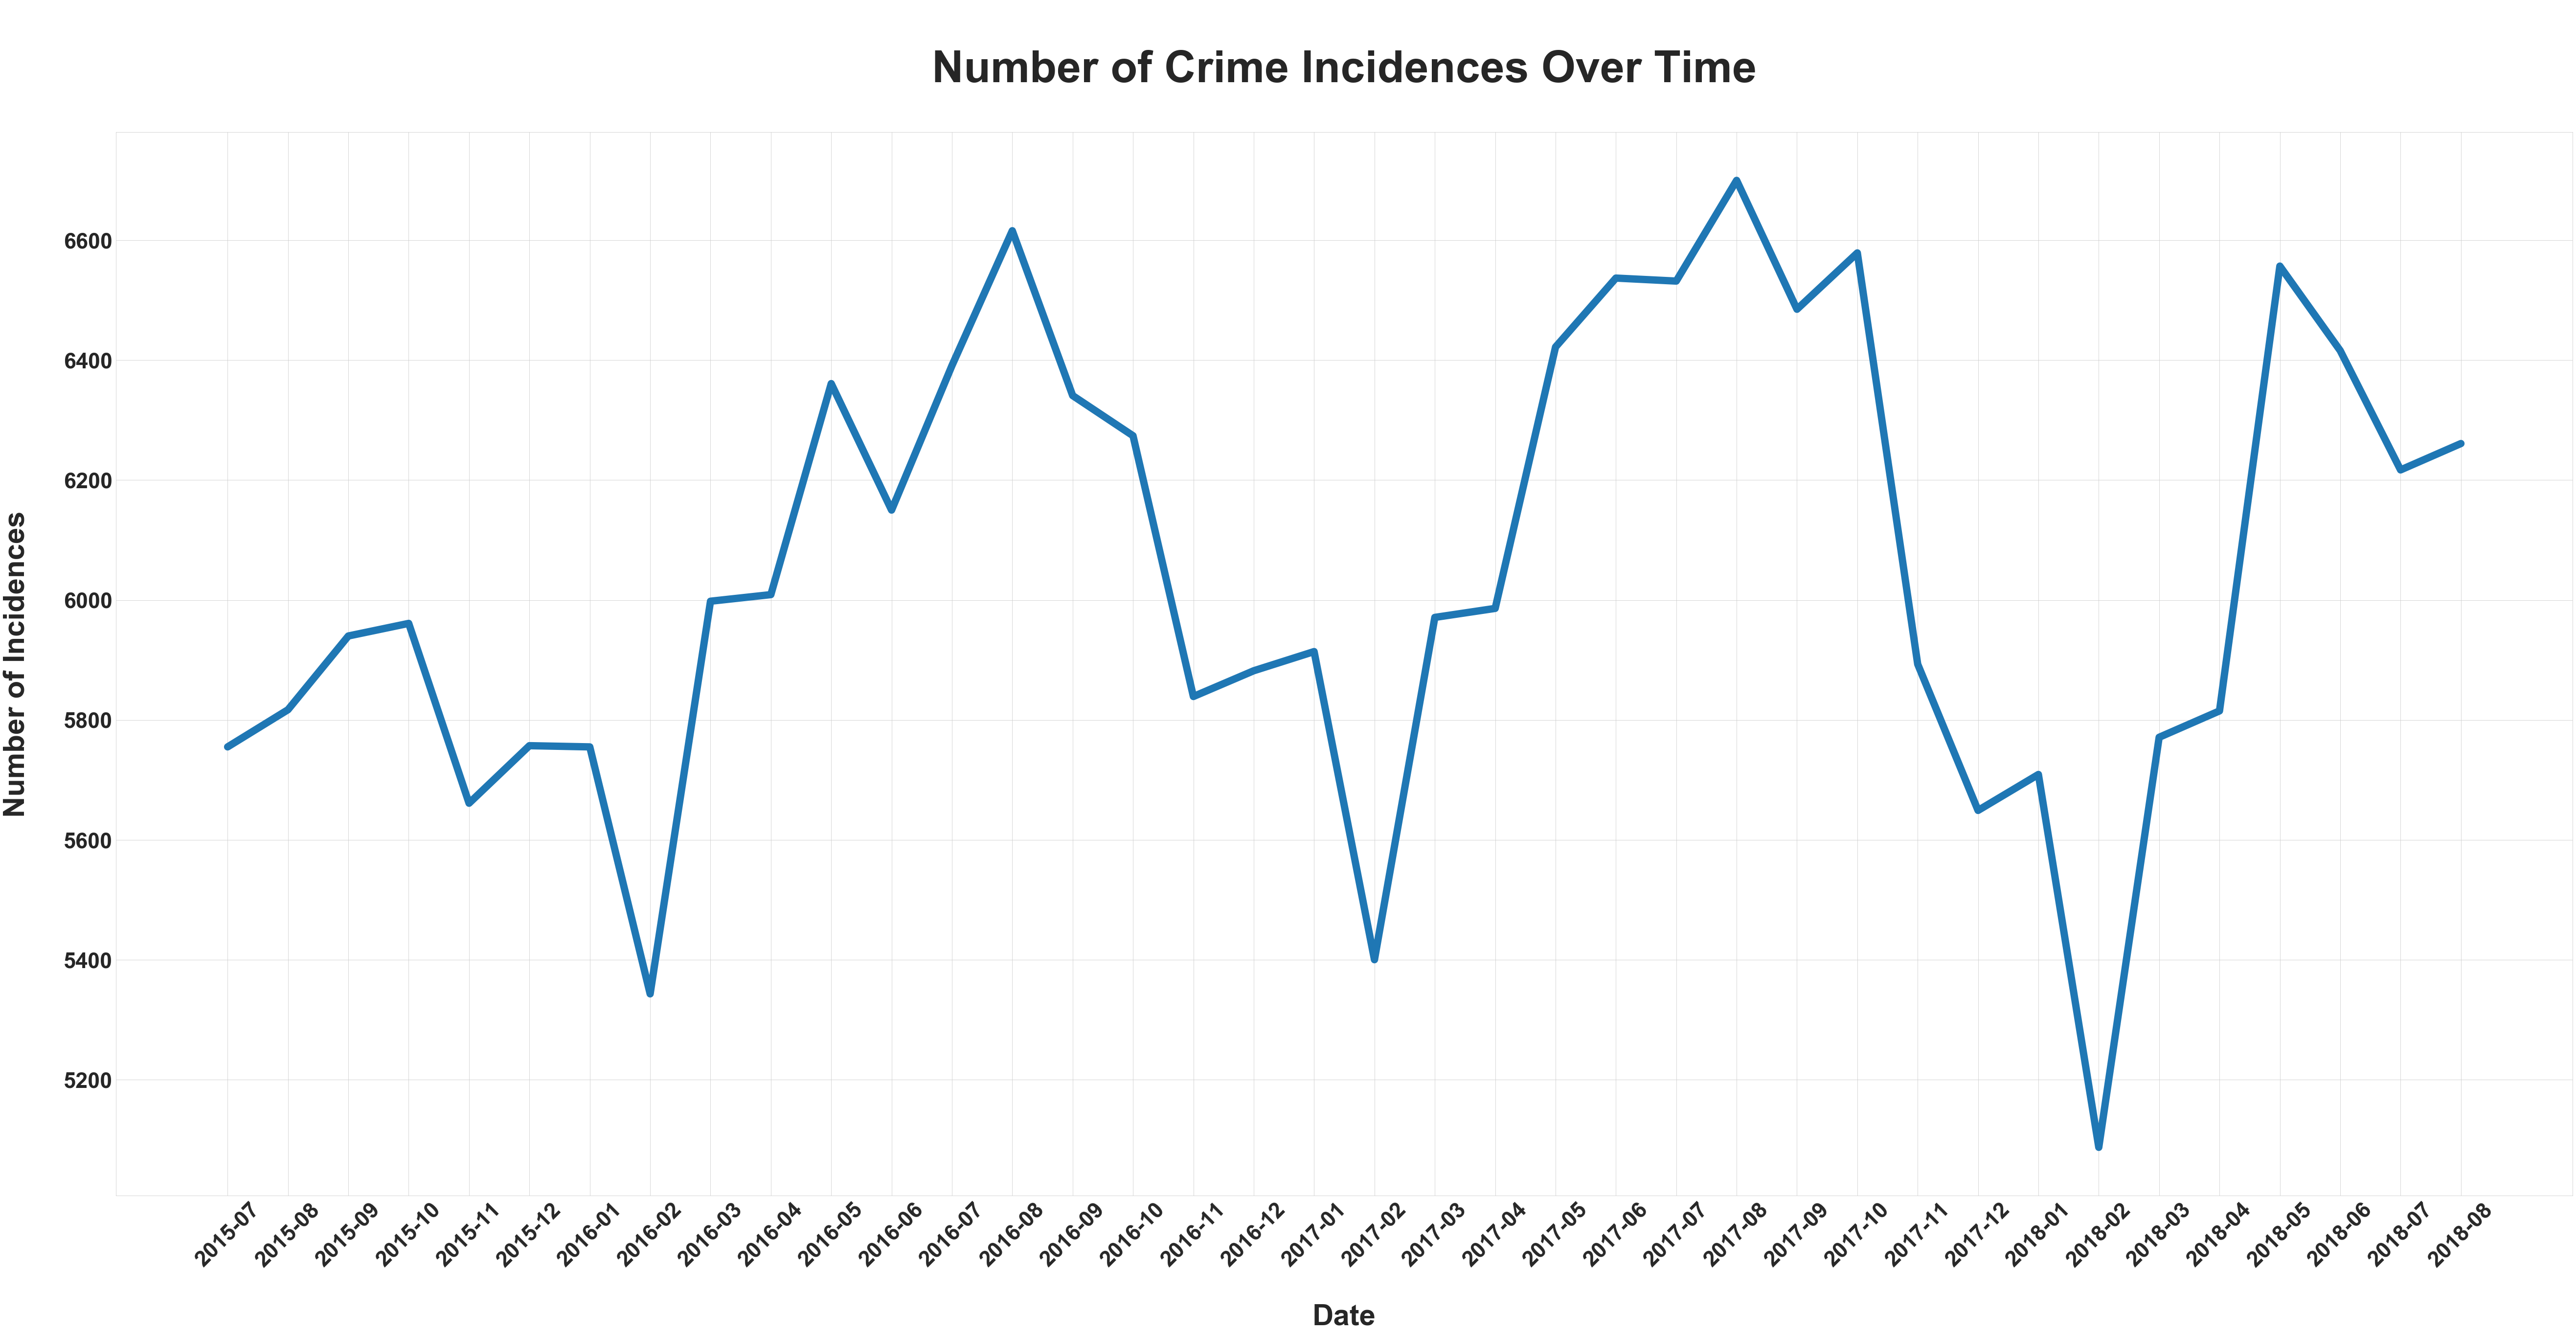

In [23]:
plt.figure(figsize = (90, 40))
plt.title('\nNumber of Crime Incidences Over Time\n', size = 90, weight = 'bold')
l = sns.lineplot(data = dates, x = 'DATE', y = 'INCIDENT_NUMBER', linewidth = 15)
l.set_xlabel('\nDate', size = 60, weight = 'bold')
l.set_ylabel('Number of Incidences\n', size = 60, weight = 'bold')
plt.xticks(size = 45, weight = 'bold', rotation = 45)
plt.yticks(size = 45, weight = 'bold')
plt.show()

__The following line graph displays the quantity of gun crimes committed, relative to time.__

__The following charts displays that generally the quantity of gun crimes committed dip during February and/or March.__

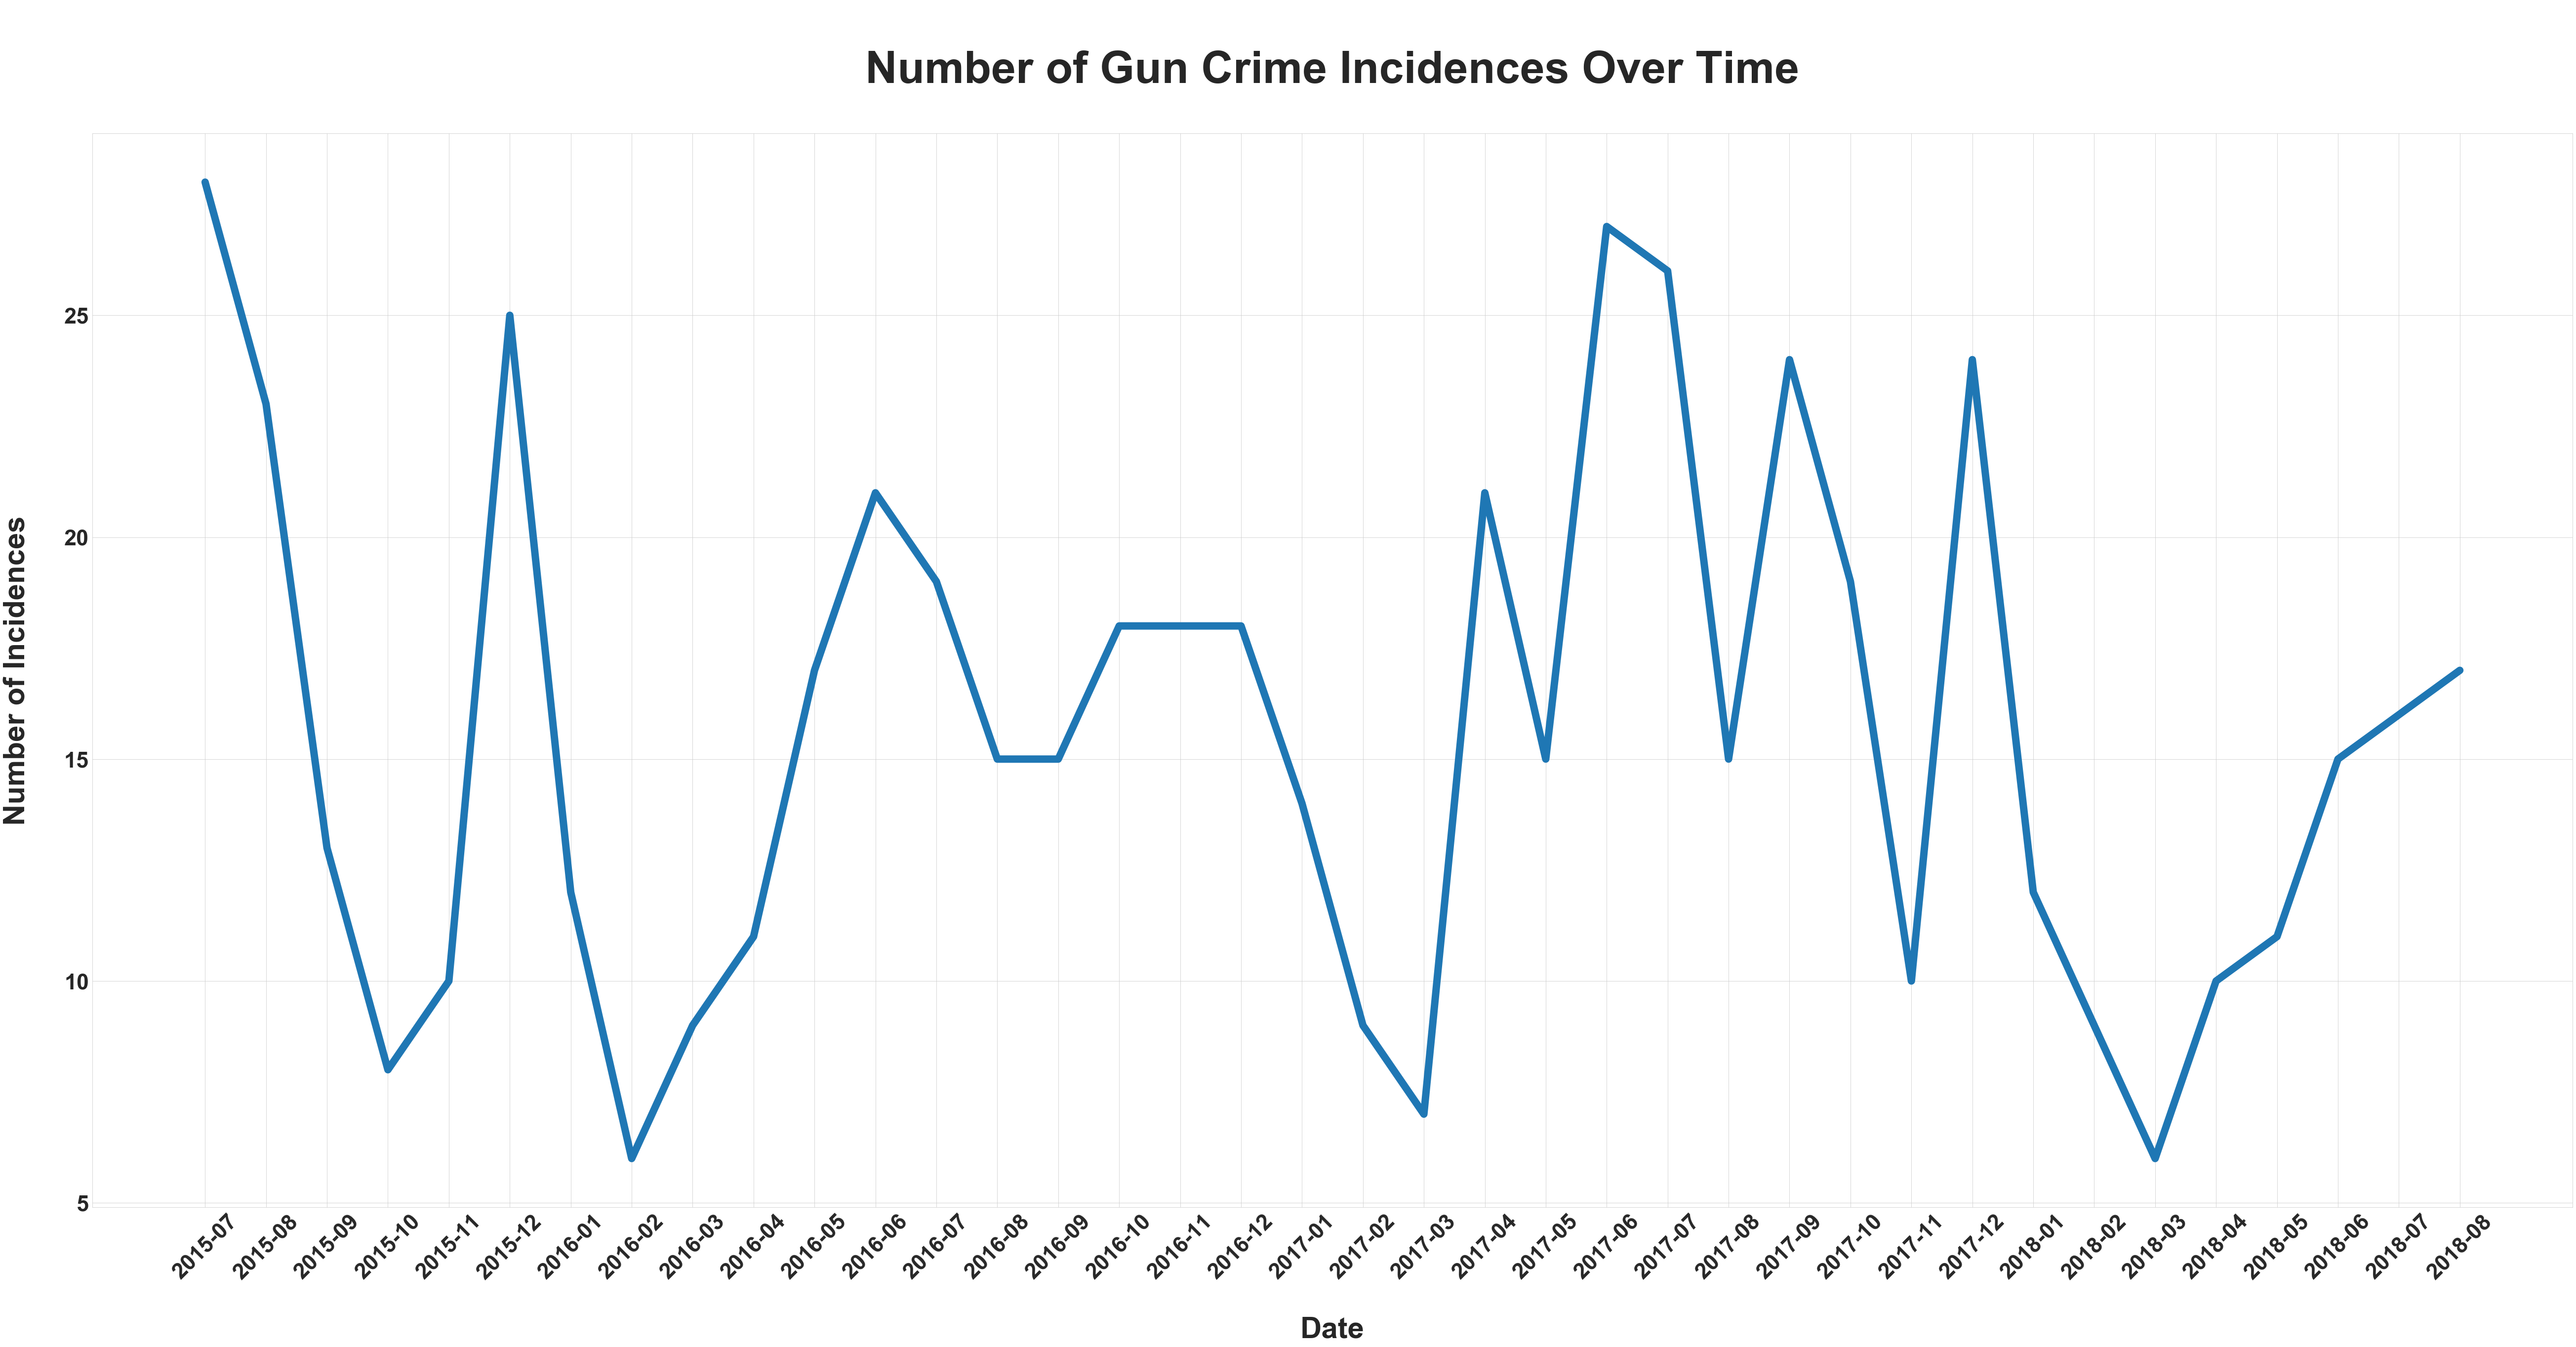

In [24]:
plt.figure(figsize = (90, 40))
plt.title('\nNumber of Gun Crime Incidences Over Time\n', size = 90, weight = 'bold')
l = sns.lineplot(data = gun_crime_dates, x = 'DATE', y = 'INCIDENT_NUMBER', linewidth = 15)
l.set_xlabel('\nDate', size = 60, weight = 'bold')
l.set_ylabel('Number of Incidences\n', size = 60, weight = 'bold')
plt.xticks(size = 45, weight = 'bold', rotation = 45)
plt.yticks(size = 45, weight = 'bold')
plt.show()

__The following charts indicate that relatively little changes occurred on the amount of crimes committed per weekday.__

__The total quantity of crimes committed per weekday, each graph per year.__

__The visualizations display that on the weekends, less crimes occur than on the weekday.__

__Friday, is the weekday, on which crime occurs the most often.__

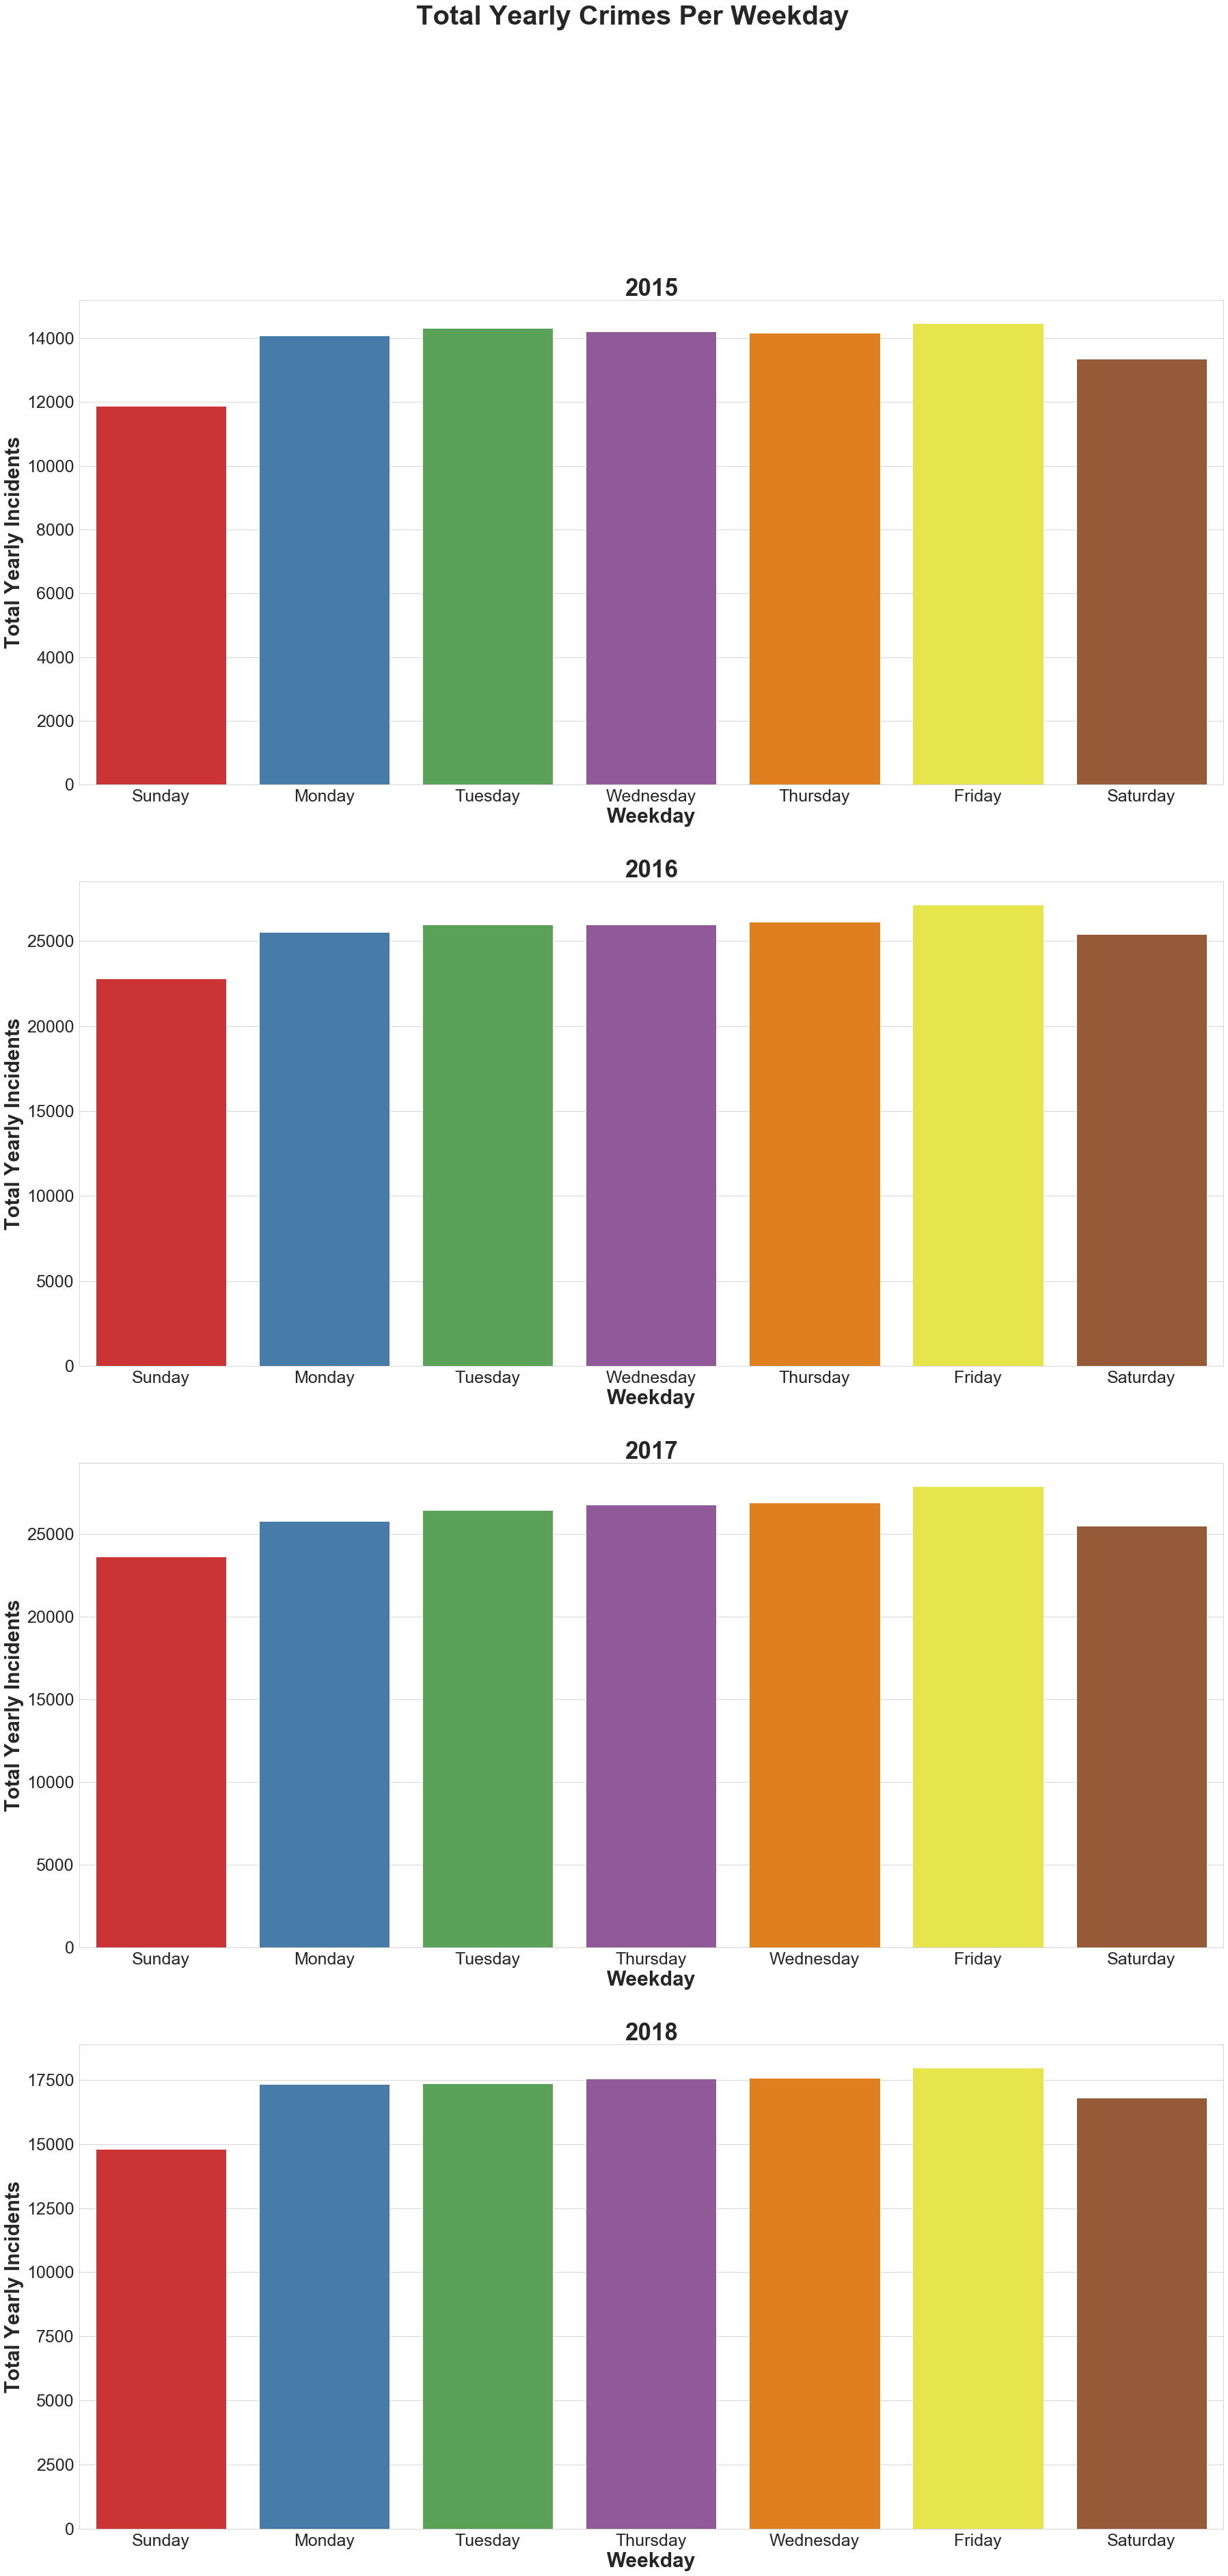

In [25]:
fig, axes = plt.subplots(4, 1 , figsize = (30, 60))
plt.suptitle('Total Yearly Crimes Per Weekday', weight = 'bold', size = 40)
sns.set_palette("Set1")

ax1 = sns.barplot(data = weekday_crime.where(weekday_crime['YEAR'] == 2015).dropna(), ax = axes[0], x = 'DAY_OF_WEEK', y = 'INCIDENT_NUMBER')
ax1.set_title('2015', weight = 'bold', size = 35)
ax1.set_xlabel('Weekday', size = 30, weight = 'bold')
ax1.set_ylabel('Total Yearly Incidents', size = 30, weight = 'bold')
ax1.tick_params(axis = 'x', labelsize = 25)
ax1.tick_params(axis = 'y', labelsize = 25)

ax2 = sns.barplot(data = weekday_crime.where(weekday_crime['YEAR'] == 2016).dropna(), ax = axes[1], x = 'DAY_OF_WEEK', y = 'INCIDENT_NUMBER')
ax2.set_title('2016', weight = 'bold', size = 35)
ax2.set_xlabel('Weekday', size = 30, weight = 'bold')
ax2.set_ylabel('Total Yearly Incidents', size = 30, weight = 'bold')
ax2.tick_params(axis = 'x', labelsize = 25)
ax2.tick_params(axis = 'y', labelsize = 25)

ax3 = sns.barplot(data = weekday_crime.where(weekday_crime['YEAR'] == 2017).dropna(), ax = axes[2], x = 'DAY_OF_WEEK', y = 'INCIDENT_NUMBER')
ax3.set_title('2017', weight = 'bold', size = 35)
ax3.set_xlabel('Weekday', size = 30, weight = 'bold')
ax3.set_ylabel('Total Yearly Incidents', size = 30, weight = 'bold')
ax3.tick_params(axis = 'x', labelsize = 25)
ax3.tick_params(axis = 'y', labelsize = 25)

ax4 = sns.barplot(data = weekday_crime.where(weekday_crime['YEAR'] == 2018).dropna(), ax = axes[3], x = 'DAY_OF_WEEK', y = 'INCIDENT_NUMBER')
ax4.set_title('2018', weight = 'bold', size = 35)
ax4.set_xlabel('Weekday', size = 30, weight = 'bold')
ax4.set_ylabel('Total Yearly Incidents', size = 30, weight = 'bold')
ax4.tick_params(axis = 'x', labelsize = 25)
ax4.tick_params(axis = 'y', labelsize = 25)

#plt.tight_layout()
plt.show()

__The following pie chart, displays the percentages of crimes committed per district.__

__District B2, contains the highest percentages of crimes committed, with D2 following.__

In [41]:
district_count

,DISTRICT,INCIDENT_NUMBER
0,A1,66302
1,A15,11588
2,A7,24488
3,B2,89529
4,B3,64743
5,C11,76824
6,C6,42358
7,D14,36032
8,D4,77130
9,E13,31594


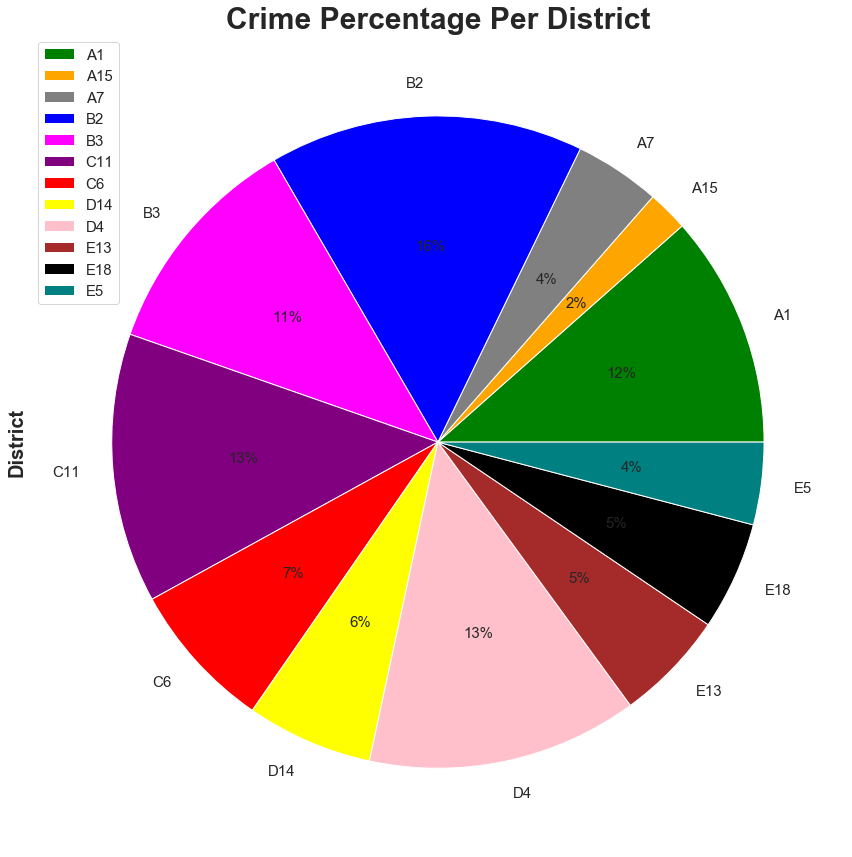

In [74]:
district_count.groupby('DISTRICT').sum().plot(kind = 'pie', y = 'INCIDENT_NUMBER', figsize = (15, 15), subplots = False, autopct='%1.0f%%', fontsize = 15, colors = colors)
plt.title('Crime Percentage Per District', weight = 'bold', size = 30)
plt.ylabel('District', size = 20, weight = 'bold')
plt.legend(loc = 'best', fontsize = 15)
plt.show()

__The following stacked column chart displayed the total quantity and averages of crimes committed per hour of the day, and stacked by district.__

__Total quantity of crimes are measured in the left y-axis, and monthly averages - on the right y-axis.__

__The graph indicates that crimes occur most often from 4pm - 6pm, and peak at 5pm.__

__The graph indicates that crimes occur least often from 1am - 7am, with the least often at 5am.__

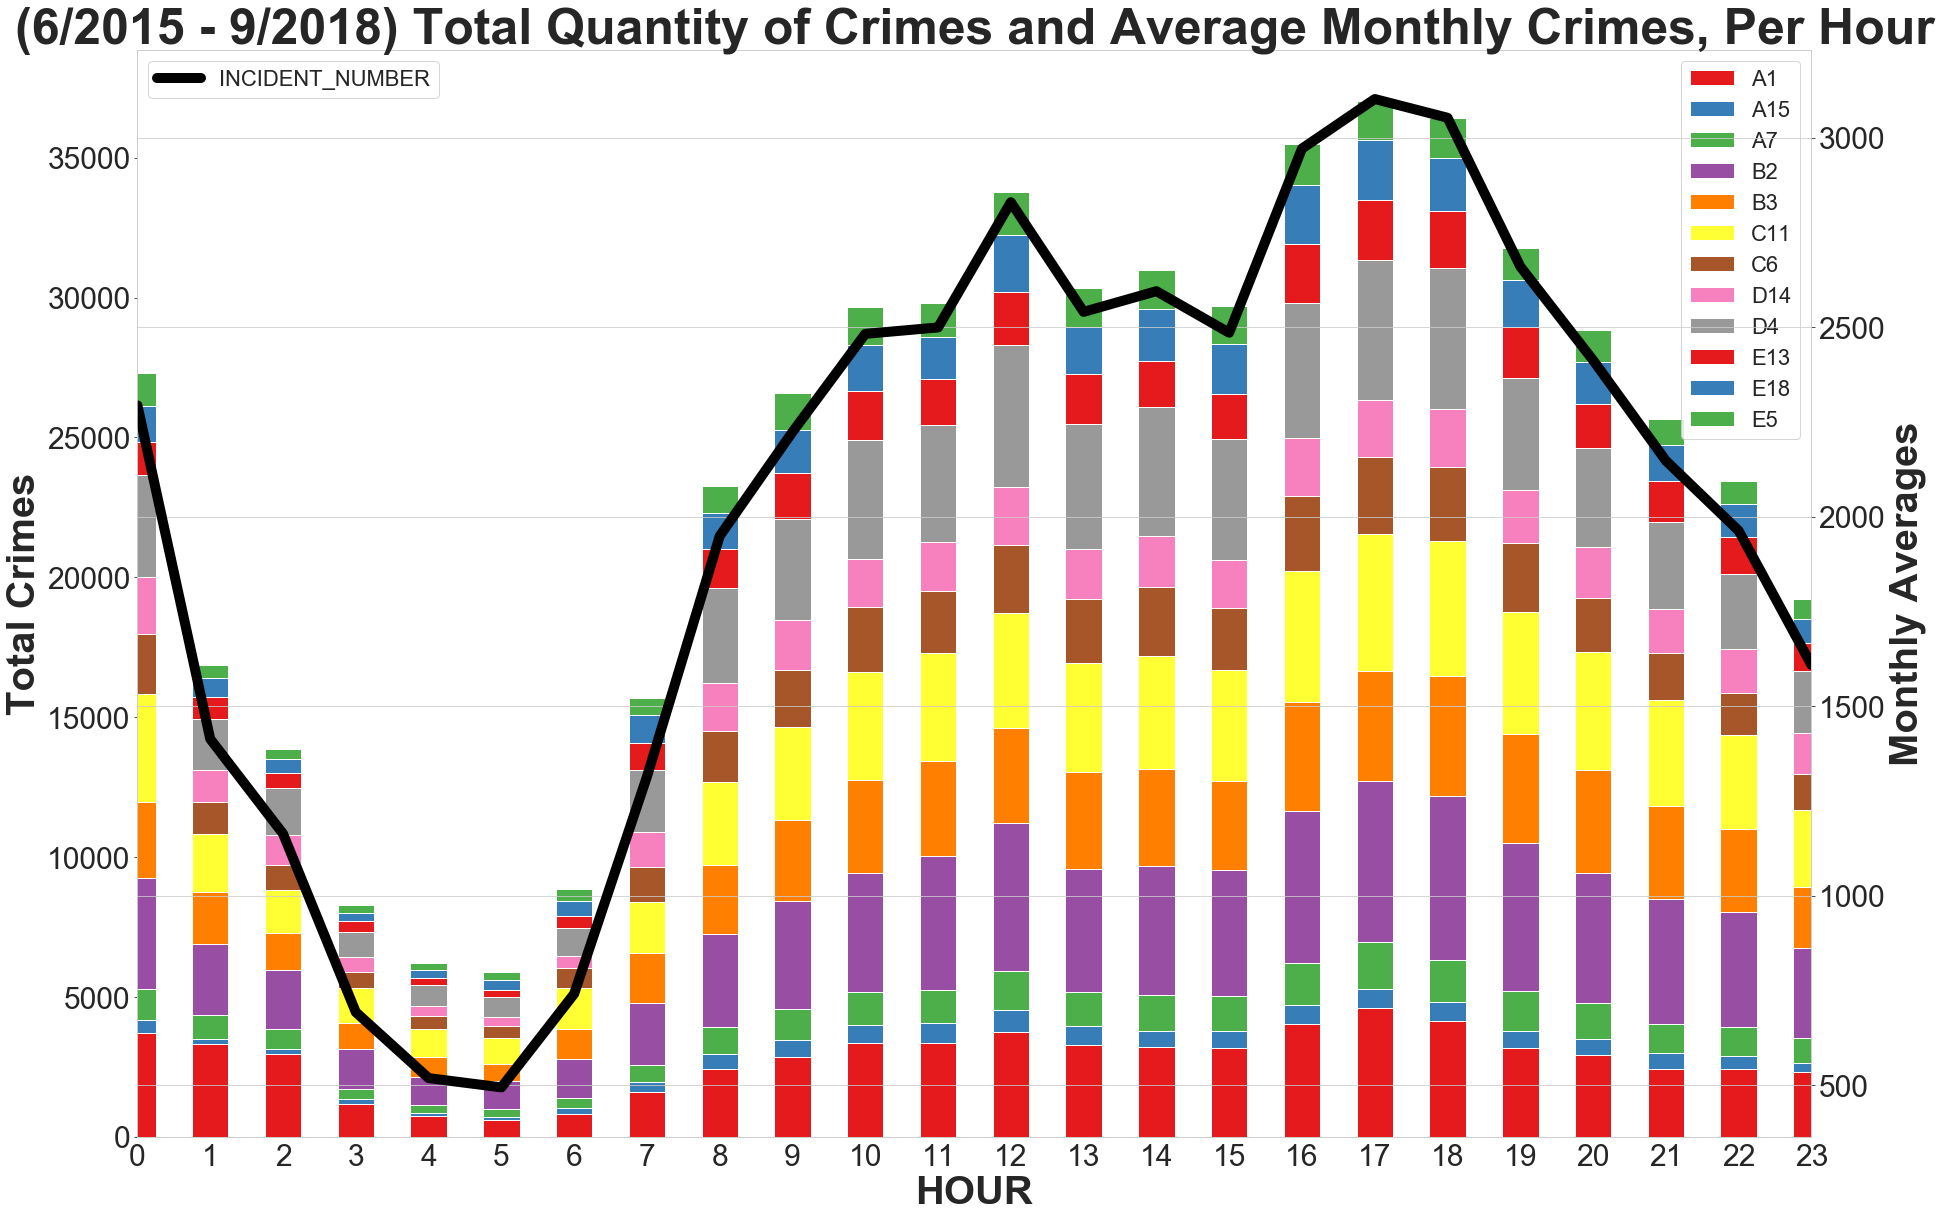

In [27]:
ax2 = incidents_per_hour.set_index('HOUR').plot(kind='bar', figsize = (30, 20), stacked = True, linewidth = 1)
ax2.tick_params(axis = 'x', labelsize = 30, labelrotation = 0)
ax2.set_xlabel('Hour', size = 40, weight = 'bold')
ax = mean_per_hour.plot(kind = 'line', x = 'HOUR', figsize = (30, 20), color = 'k', linewidth = 10, ax= ax2, secondary_y = True)
ax.tick_params(axis = 'y', labelsize = 30)
ax.set_ylabel('Monthly Averages', size = 40, weight = 'bold')
ax2.set_ylabel('Total Crimes', size = 40, weight = 'bold')
ax2.tick_params(axis = 'y', labelsize = 30)
ax2.legend(fontsize = 22)
ax.legend(loc='upper left', fontsize = 22)
plt.title('(6/2015 - 9/2018) Total Quantity of Crimes and Average Monthly Crimes, Per Hour', size = 50, weight = 'bold')
plt.show()

__The following horizontal bar graph displays the monthly averages of crimes, and stacked by gun or non-gun crimes.__

__The graph indicates that the vast majority of crimes committed or non-gun crimes.__

__The months of May, July and August, are statistically prone to the most quantities of crimes, and September to be the most safest.__

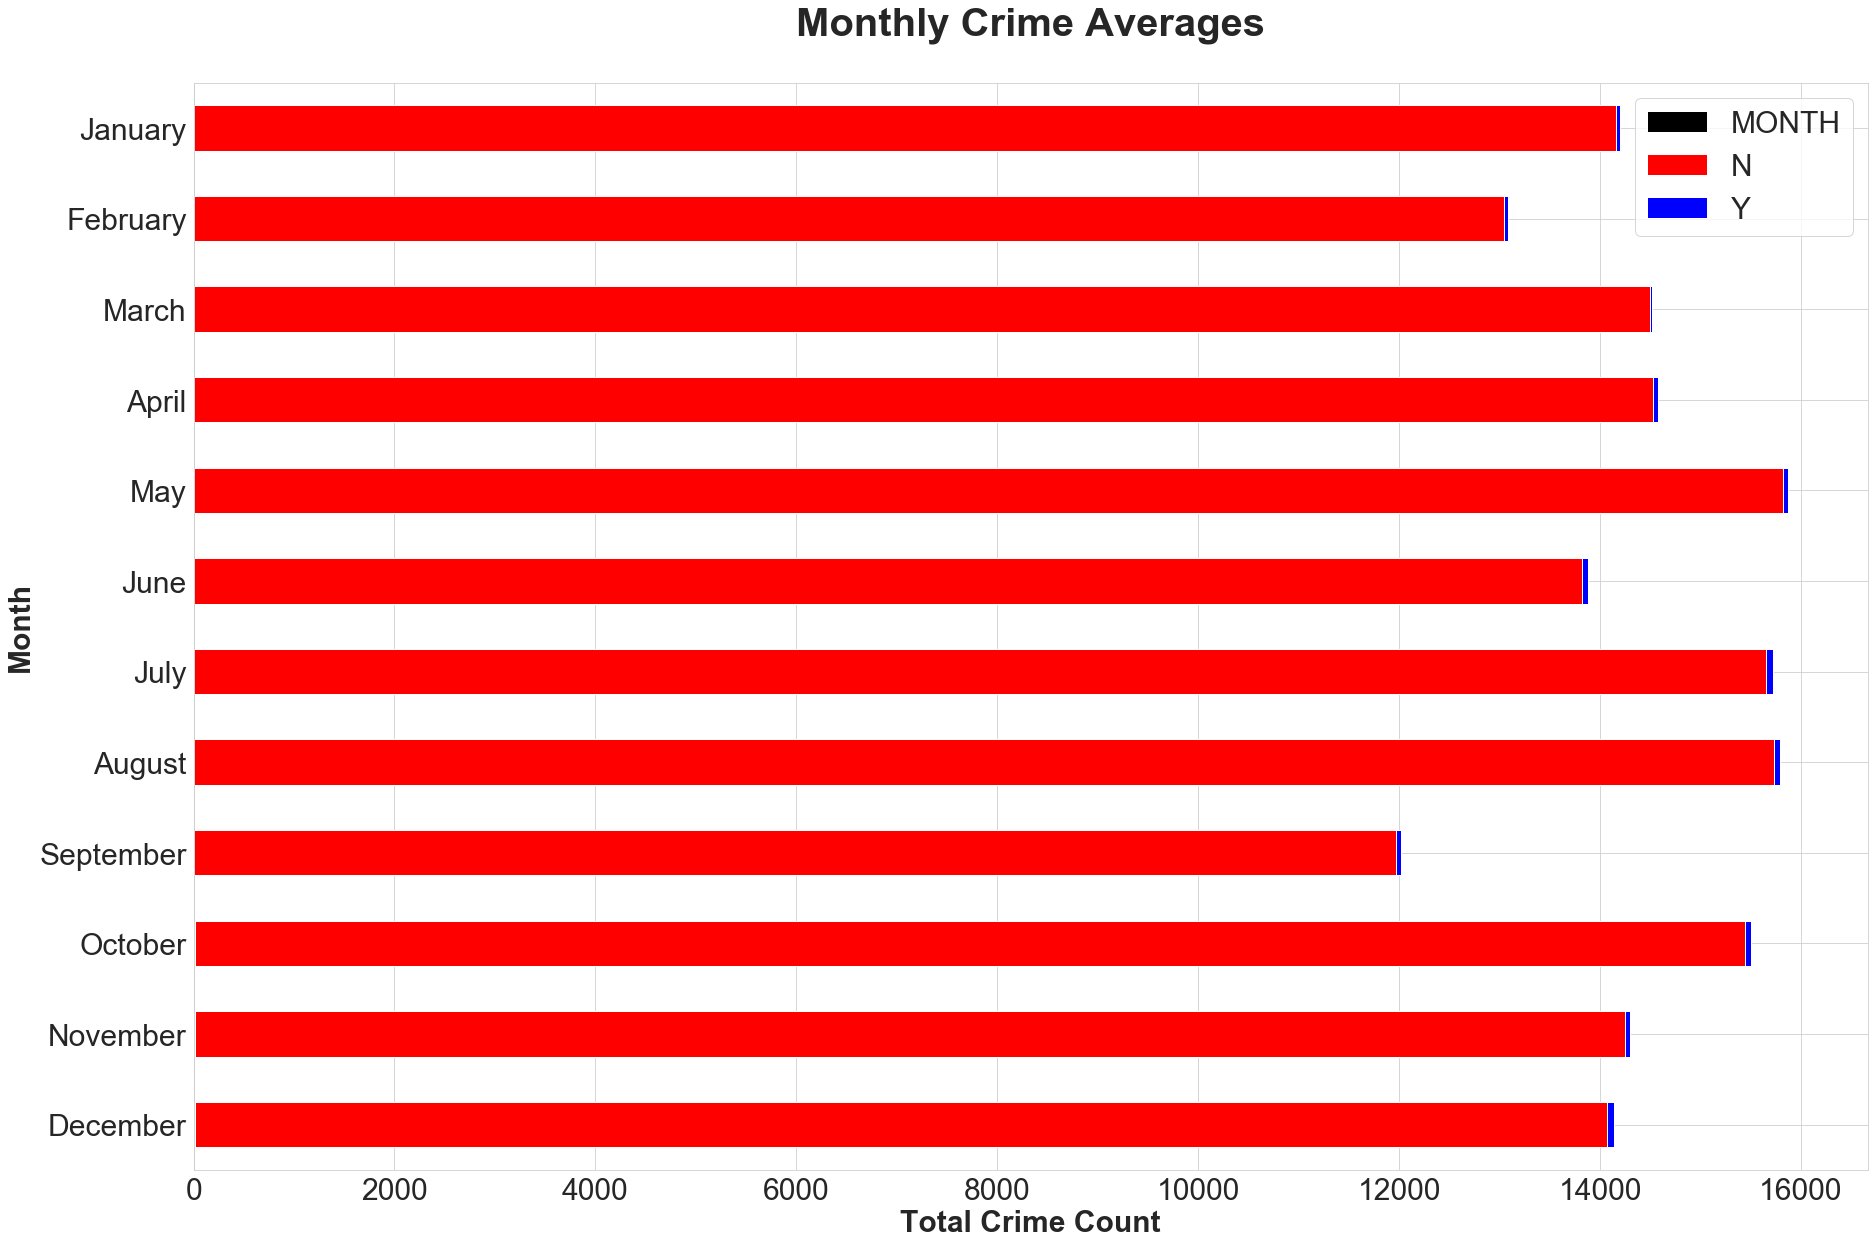

In [28]:
monthly_crime.plot(kind = 'barh', stacked = True, figsize = (30, 20), x = 'MONTH_NAME', color = ['k', 'r', 'b'])
plt.title('Monthly Crime Averages\n', size = 40, weight = 'bold')
plt.xticks(size = 30, rotation = 0)
plt.yticks(size = 30)
plt.ylabel('Month', size = 30, weight = 'bold')
plt.xlabel('Total Crime Count', size = 30, weight = 'bold')
plt.legend(fontsize = 30)
plt.show()